<a href="https://colab.research.google.com/github/ZainaNamugabo/Stock-Data-Analysis-trend-prediction/blob/main/Sock_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/ULTA_stock_data.csv')

# Rename the column and assign the result back to df (inplace=False by default)
df = df.rename(columns={"Unnamed: 0": "Date"})

# Set the 'Date' column as the index
df = df.set_index('Date')

# Display the head of the DataFrame
df.head()

,open,high,low,close,adjclose,volume,ticker
Date,,,,,,,
2007-10-25,33.000000,35.000000,28.889999,29.820000,29.490023,7486900,ULTA
2007-10-26,29.690001,32.980000,29.250000,32.000000,31.645901,1625600,ULTA
2007-10-29,34.000000,35.000000,32.650002,34.700001,34.316025,667900,ULTA
2007-10-30,35.220001,35.599998,33.000000,35.430000,35.037945,455600,ULTA
2007-10-31,34.930000,35.630001,32.950001,34.200001,33.821556,393200,ULTA


In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')

In [ ]:
df.shape

(4192, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4192 non-null   object 
 1   open      4192 non-null   float64
 2   high      4192 non-null   float64
 3   low       4192 non-null   float64
 4   close     4192 non-null   float64
 5   adjclose  4192 non-null   float64
 6   volume    4192 non-null   int64  
 7   ticker    4192 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 262.1+ KB


In [ ]:
df.isna().sum()

,0
open,0
high,0
low,0
close,0
adjclose,0
volume,0
ticker,0


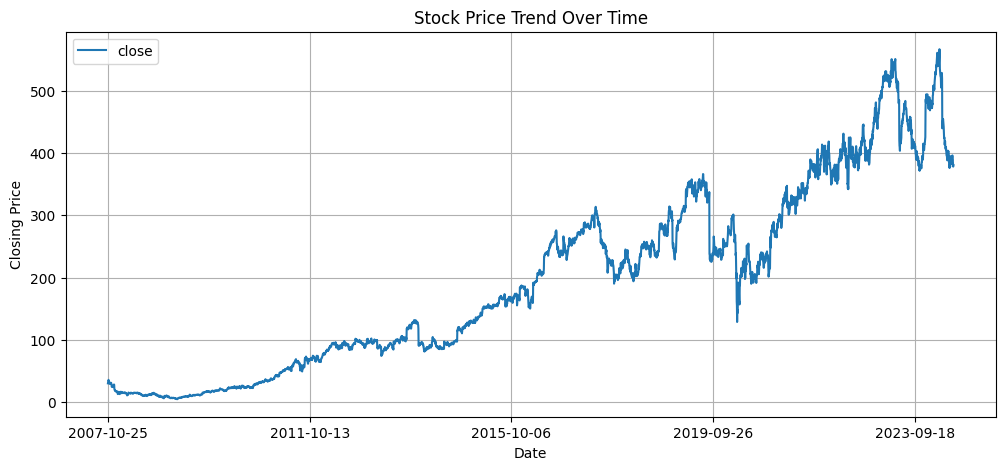

In [ ]:
plt.figure(figsize = (10, 5))
df['close'].plot()
plt.title("Stock Price Trend Over Time")
plt.legend()
plt.grid()
plt.ylabel('Closing Price');


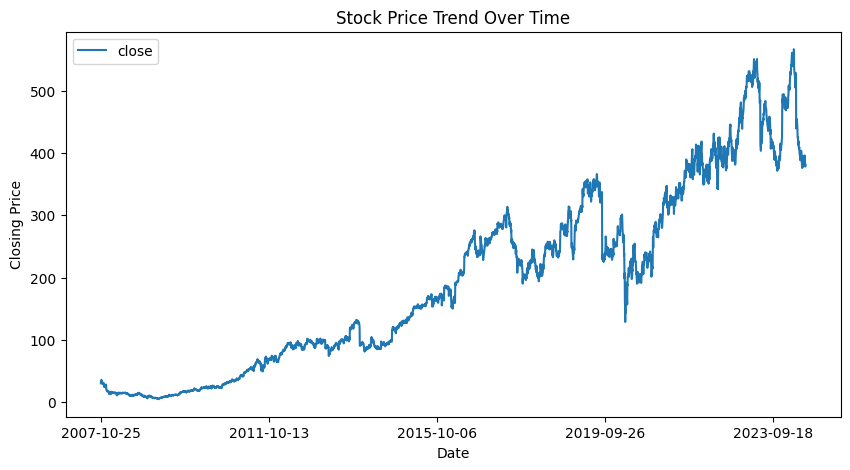

In [ ]:
plt.figure(figsize = (10, 5))
df['close'].plot()
plt.title("Stock Price Trend Over Time")
plt.legend()
plt.ylabel('Closing Price');
plt.savefig('stock_price_trend.png')

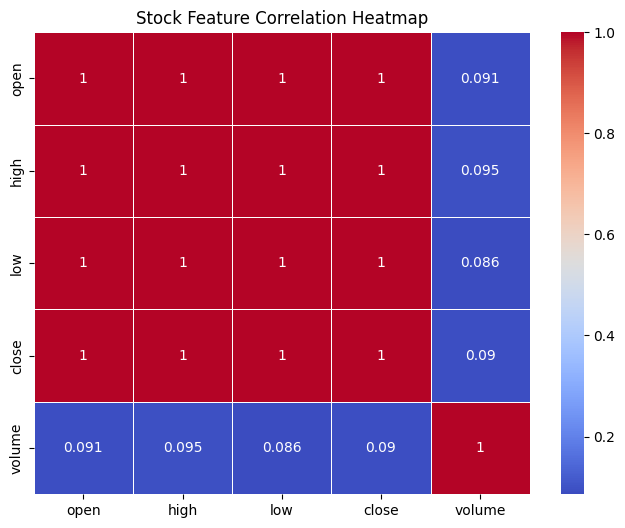

In [ ]:
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Stock Feature Correlation Heatmap")
plt.savefig('stock_feature_correlation.png')
plt.show()


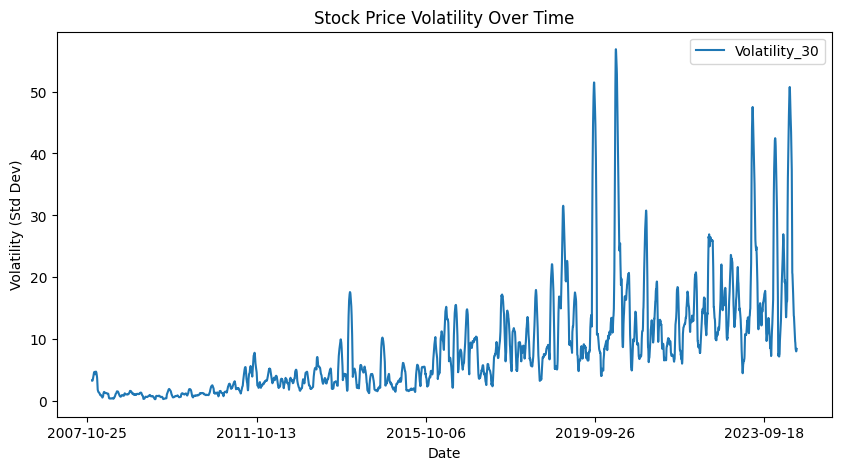

In [ ]:
# Compute rolling standard deviation
df['Volatility_30'] = df['close'].rolling(window=30).std()

# Plot volatility trend
plt.figure(figsize=(10, 5))
df['Volatility_30'].plot()
plt.title("Stock Price Volatility Over Time")
plt.ylabel("Volatility (Std Dev)")
plt.legend()
plt.savefig('stock_price_volatility.png')
plt.show()


In [ ]:
df.tail()

,open,high,low,close,adjclose,volume,ticker,SMA_20,EMA_20,SMA_50,SMA_200,Volatility_30
Date,,,,,,,,,,,,
2024-06-14,395.250000,396.709991,388.500000,390.820007,390.820007,781200,ULTA,386.285500,390.541960,403.9816,446.075500,8.144646
2024-06-17,390.109985,391.500000,385.399994,389.149994,389.149994,670900,ULTA,385.764999,390.409392,402.8696,445.906750,8.034898
2024-06-18,388.000000,390.630005,382.279999,382.589996,382.589996,778600,ULTA,385.569499,389.664688,401.4658,445.744550,8.091041
2024-06-20,381.850006,384.769989,376.390015,378.399994,378.399994,992900,ULTA,385.398000,388.591860,399.9378,445.556500,8.303583
2024-06-21,380.799988,385.667297,379.640015,380.834991,380.834991,536750,ULTA,385.523250,387.853110,398.5355,445.383225,8.439133


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
train =df.loc['2007-01-02':'2023-12-31', ['close']]
test = df.loc['2024-01-01':'2024-01-31', ['close']]
print(train.head())
print(test.head())

                close
Date                 
2007-10-25  29.820000
2007-10-26  32.000000
2007-10-29  34.700001
2007-10-30  35.430000
2007-10-31  34.200001
                 close
Date                  
2024-01-02  486.609985
2024-01-03  473.820007
2024-01-04  468.920013
2024-01-05  471.119995
2024-01-08  482.959991


In [ ]:
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [ ]:
# Reshape data into sequences using TimeseriesGenerator
train_features = TimeseriesGenerator(train, train, length = 5)

# Step 1: Define our network structure
# Save the input shape
input_shape = train_features[0][0][0].shape
input_shape

(5, 1)

In [ ]:
# Sequential model
model = Sequential()
# LSTM layer
model.add(LSTM(units = 50,
               return_sequences = True, # True if next layer will be a recurrent layer
               input_shape = input_shape))
model.add(LSTM(units = 50,return_sequences = True))
model.add(LSTM(units = 50,
               return_sequences = False))
# Output layer
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
history = model.fit(train_features,
                    epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1108
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0017
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.9019e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9709e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2440e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4657e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8820e-04
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9745e-04
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7095e-04
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.5420e-04
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.1780e-04
Epoch 15/100
32/32 ━━━━━━━━━━━━━━

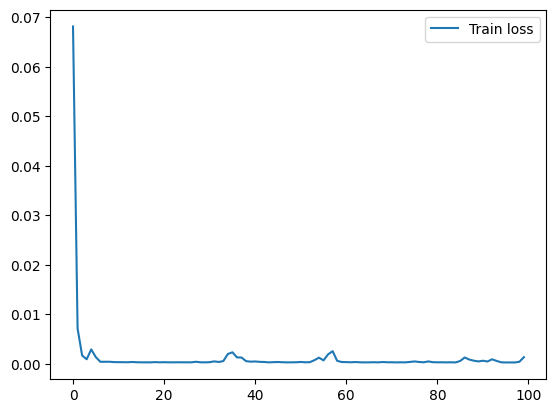

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.legend();

In [ ]:
test_features = TimeseriesGenerator(test, test, length = 5)
preds = model.predict(test_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


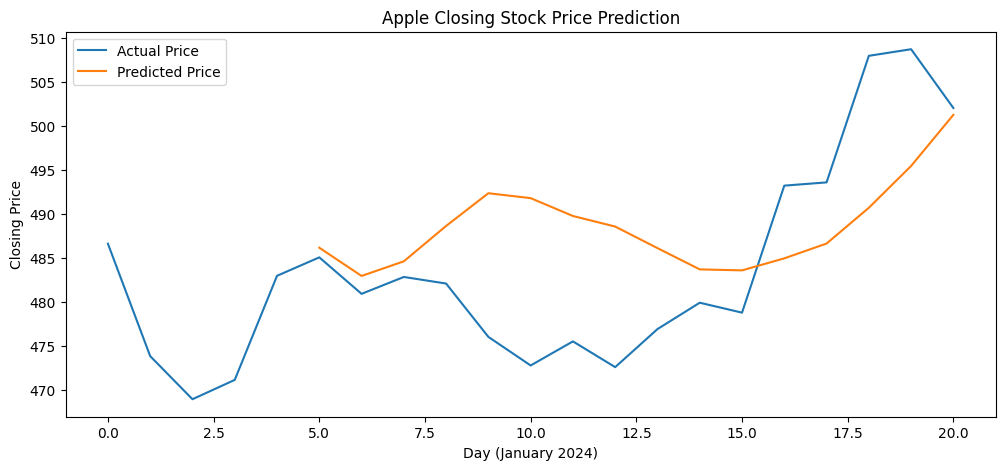

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(scaler.inverse_transform(test), label='Actual Price')
# Note: there are less prices for the predicted price than the actual price,
# because we need to use 5 days of prices to create our first prediction
plt.plot(range(5, len(test)), scaler.inverse_transform(preds), label='Predicted Price')
plt.title('Apple Closing Stock Price Prediction')
plt.xlabel('Day (January 2024)')
plt.ylabel('Closing Price')
plt.legend();

In [ ]:
train_data = df[df.index < "2023-01-01"]  # Train on 2019–2022
val_data = df[(df.index >= "2023-01-01") & (df.index < "2024-01-01")]  # Validate on 2023
test_data = df[df.index >= "2024-01-01"]  # Test on 2024 only if reliable

print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", val_data.shape)
print("Testing Data Shape:", test_data.shape)


Training Data Shape: (3823, 12)
Validation Data Shape: (250, 12)
Testing Data Shape: (119, 12)


In [ ]:
features = ['open', 'high', 'low', 'volume']
target = ['close'] # Also change 'Close' to 'close' for consistency

X = df[features].values
y = df[target].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
# Define sequence length
sequence_length = 30

# Create sequences
X_seq, y_seq = [], []
for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i + sequence_length])
    y_seq.append(y_scaled[i + sequence_length])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X_seq.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_seq, y_seq, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0106 - val_loss: 0.0035
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.9561e-04 - val_loss: 0.0098
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 9.1894e-04 - val_loss: 0.0061
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 6.6927e-04 - val_loss: 0.0017
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 7.2409e-04 - val_loss: 0.0025
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 7.3777e-04 - val_loss: 0.0026
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 5.6413e-04 - val_loss: 0.0017
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 4.6720e-04 - val_loss: 8.9283e-04
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 5.4786e-04 - val_loss: 0.0012
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 4.6946e-04 - val_loss: 7.4974e-04
Epoch 12

In [ ]:
# Make predictions
predictions = model.predict(X_seq)

# Convert back to original scale
predictions_rescaled = scaler.inverse_transform(predictions)

# Add predictions to DataFrame
df.loc[df.index[sequence_length:], 'Predicted_Close'] = predictions_rescaled

# Display results
print(df[['close', 'Predicted_Close']].tail())

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
                 close  Predicted_Close
Date                                   
2024-06-14  390.820007       339.534180
2024-06-17  389.149994       341.531372
2024-06-18  382.589996       340.136749
2024-06-20  378.399994       337.497925
2024-06-21  380.834991       333.564117
